# Install

In [6]:
pip install pybaseball

# Imports

In [13]:
import os
import pandas as pd
import numpy as np
import pybaseball as pyb
from pybaseball import batting_stats

# Pitch Type
***

In [14]:
# imports
import pybaseball as pyb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Or other models
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# get data from 2023 season
data = pyb.statcast(start_dt='2023-03-30', end_dt='2023-10-01')

This is a large query, it may take a moment to complete


/usr/local/lib/python3.11/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/186 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_co

In [28]:
data.to_csv('statcast_2023.csv')

In [15]:
data = pd.read_csv('statcast_2023.csv')

In [16]:
data.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
0,2377,CH,2023-10-01,89.0,-2.80,5.59,"Robertson, Nick",677008,687798,field_out,...,1,3,11.0,1.0,NaN,NaN,2.55,1.53,-1.53,31.7
1,2515,FF,2023-10-01,96.9,-2.40,5.90,"Robertson, Nick",677008,687798,NaN,...,1,3,11.0,1.0,NaN,NaN,1.09,0.76,-0.76,47.4
2,2603,CH,2023-10-01,90.0,-2.93,5.56,"Robertson, Nick",677008,687798,NaN,...,1,3,11.0,1.0,NaN,NaN,2.47,1.65,-1.65,30.3
3,2675,ST,2023-10-01,82.2,-3.09,5.55,"Robertson, Nick",677008,687798,NaN,...,1,3,11.0,1.0,NaN,NaN,3.14,-1.43,1.43,28.9
4,2803,CH,2023-10-01,89.2,-2.87,5.58,"Robertson, Nick",677008,687798,NaN,...,1,3,11.0,1.0,NaN,NaN,2.57,1.49,-1.49,34.3


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717945 entries, 2377 to 4478
Columns: 113 entries, pitch_type to arm_angle
dtypes: Float64(37), Int64(59), datetime64[ns](1), object(16)
memory usage: 690.2+ MB


In [27]:
data.describe()

,Unnamed: 0,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
count,717945.00000,717673.000000,717674.000000,717674.000000,717945.000000,717945.000000,0.0,0.0,0.0,0.0,...,717945.000000,717945.000000,683215.000000,709170.000000,689925.000000,711806.000000,717674.000000,717674.000000,717674.000000,710803.000000
mean,2074.85802,88.999133,-0.859690,5.771993,630709.126472,625399.983989,NaN,NaN,NaN,NaN,...,1.487830,1.546882,6.038538,1.658006,6.193807,1.674271,2.334526,0.326040,-0.098768,38.777228
std,1268.32484,6.109357,1.826818,0.541114,56479.769557,58478.489424,NaN,NaN,NaN,NaN,...,0.712589,1.261768,8.485873,3.457493,8.984357,3.635380,1.080263,0.841414,0.896953,12.784798
min,0.00000,33.400000,-4.850000,0.760000,408234.000000,425794.000000,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.150000,-2.580000,-2.580000,-70.700000
25%,986.00000,84.600000,-2.140000,5.490000,605137.000000,600917.000000,NaN,NaN,NaN,NaN,...,1.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.410000,-0.320000,-0.860000,31.900000
50%,1998.00000,89.800000,-1.530000,5.810000,656716.000000,646242.000000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,5.000000,1.000000,5.000000,1.000000,2.220000,0.480000,-0.190000,40.000000
75%,3102.00000,93.900000,0.750000,6.100000,669127.000000,668678.000000,NaN,NaN,NaN,NaN,...,2.000000,3.000000,6.000000,2.000000,6.000000,2.000000,3.000000,1.040000,0.640000,47.100000
max,5394.00000,104.800000,4.740000,8.110000,807799.000000,701643.000000,NaN,NaN,NaN,NaN,...,4.000000,6.000000,172.000000,163.000000,172.000000,163.000000,22.530000,2.440000,2.360000,84.000000


In [32]:
# handle missing
# data = data.dropna()

In [28]:
# select certain features
features = ['release_speed', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z']
# release_pos_x, release_pos_z, zone, release_spin, spin axis
target = 'pitch_type'
data = data[features + [target]]
data.head()

,release_speed,pfx_x,pfx_z,plate_x,plate_z,pitch_type
0,89.0,-1.53,0.33,0.33,2.01,CH
1,96.9,-0.76,1.36,0.09,2.71,FF
2,90.0,-1.65,0.36,-0.24,0.53,CH
3,82.2,1.43,0.28,0.81,0.49,ST
4,89.2,-1.49,0.31,-0.78,2.05,CH


In [29]:
column_means = data.mean(numeric_only=True)

# Fill NaN values with the respective column means
data_imputed = data.fillna(column_means)
data_imputed.head()

,release_speed,pfx_x,pfx_z,plate_x,plate_z,pitch_type
0,89.0,-1.53,0.33,0.33,2.01,CH
1,96.9,-0.76,1.36,0.09,2.71,FF
2,90.0,-1.65,0.36,-0.24,0.53,CH
3,82.2,1.43,0.28,0.81,0.49,ST
4,89.2,-1.49,0.31,-0.78,2.05,CH


In [30]:
data_imputed = data_imputed.dropna()

## Logistic Regression (OvR)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data_imputed[features], data_imputed[target], test_size=0.2, random_state=42)

In [52]:
# OvR (one vs rest classifier) creates classifier for each
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Accuracy and ROC Curve

In [53]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5719301912425541
              precision    recall  f1-score   support

          CH       0.38      0.18      0.25     15566
          CS       0.00      0.00      0.00        11
          CU       0.74      0.58      0.65      9407
          EP       0.00      0.00      0.00       117
          FA       0.00      0.00      0.00       218
          FC       0.10      0.01      0.01     11379
          FF       0.71      0.97      0.82     46184
          FO       0.00      0.00      0.00       138
          FS       0.00      0.00      0.00      3207
          KC       0.00      0.00      0.00      3030
          KN       0.00      0.00      0.00        39
          PO       0.00      0.00      0.00         5
          SC       0.00      0.00      0.00        14
          SI       0.43      0.45      0.44     22203
          SL       0.45      0.79      0.57     23398
          ST       0.60      0.04      0.07      8050
          SV       0.00      0.00      0.00       56

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
y_pred

array(['FF', 'SI', 'SL', ..., 'FF', 'FF', 'FF'], dtype=object)

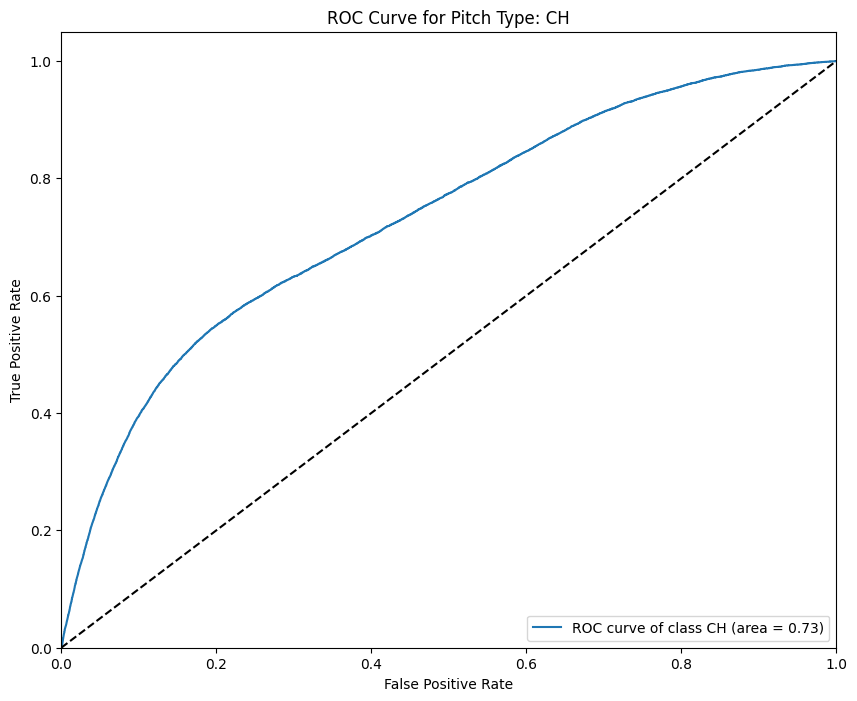

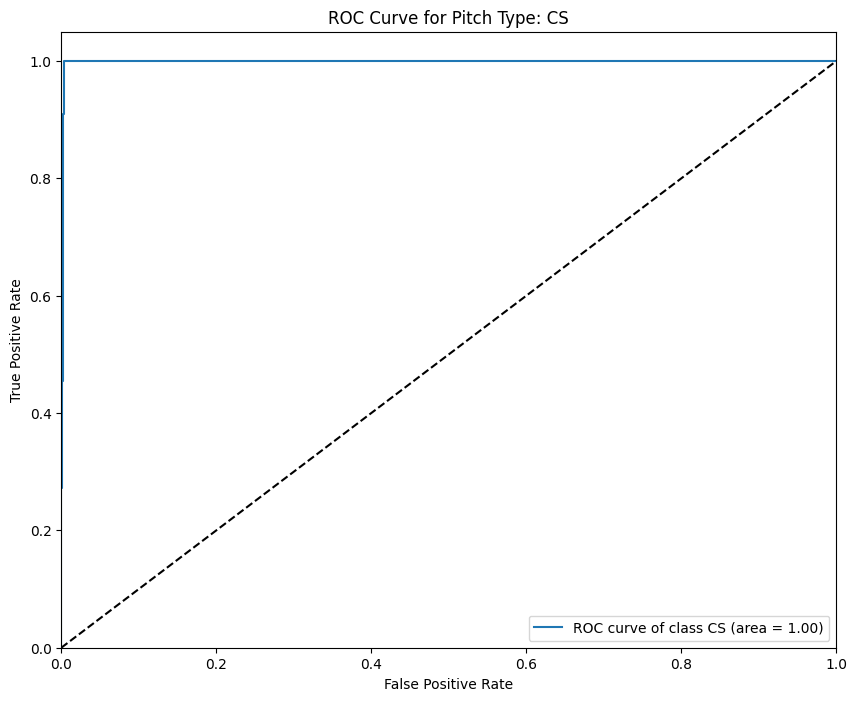

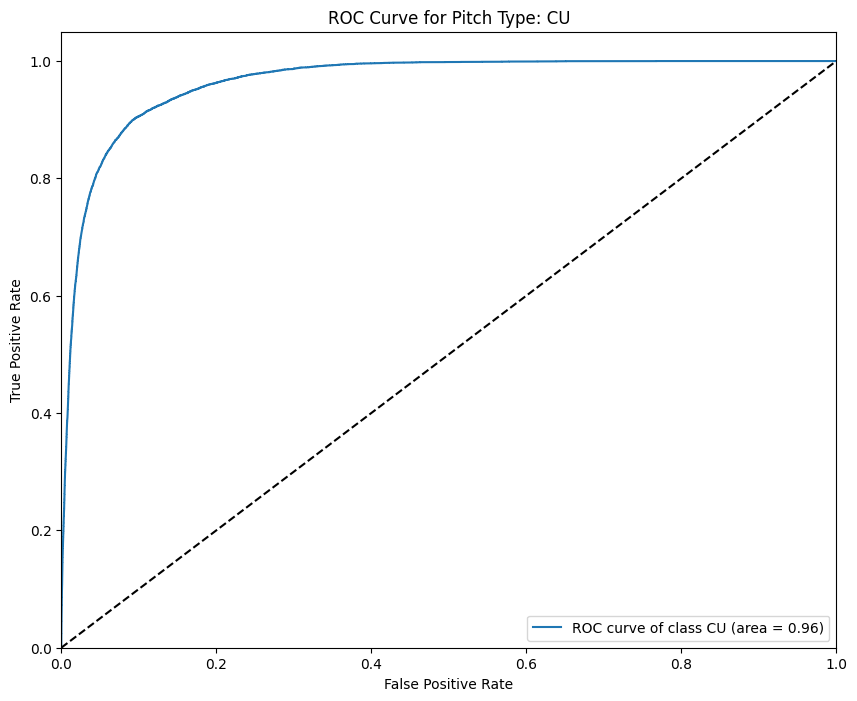

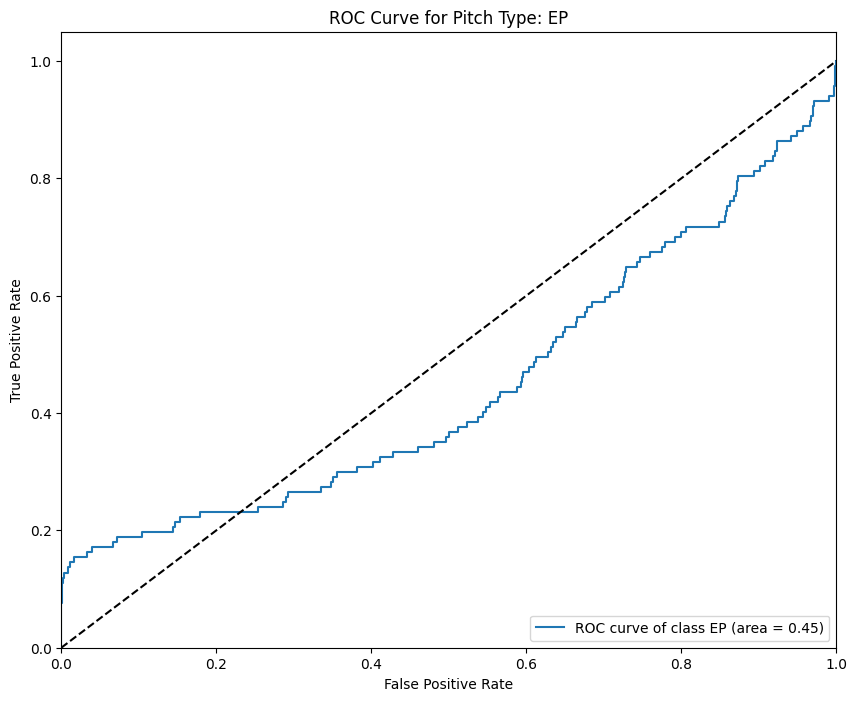

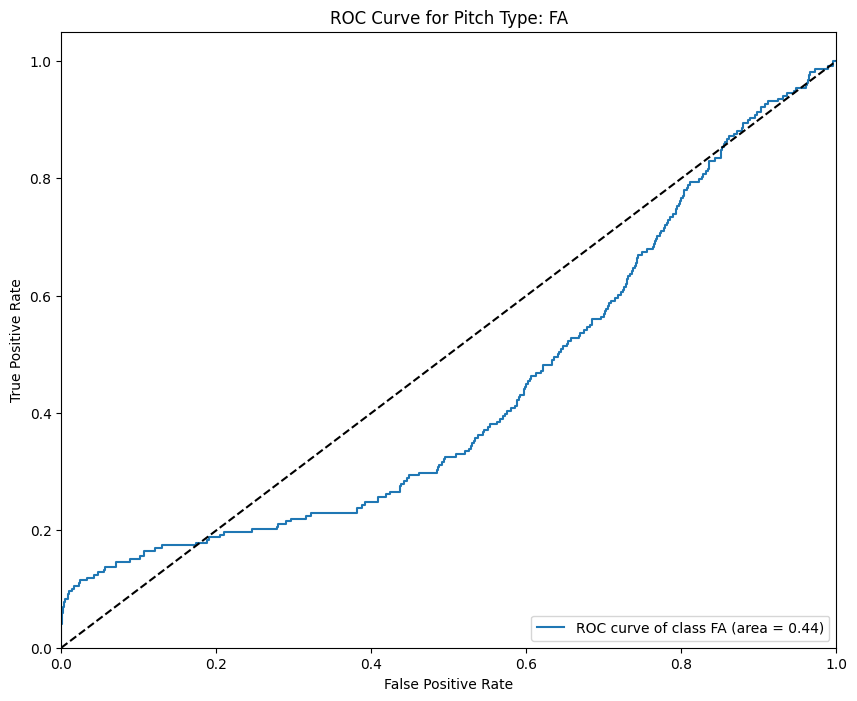

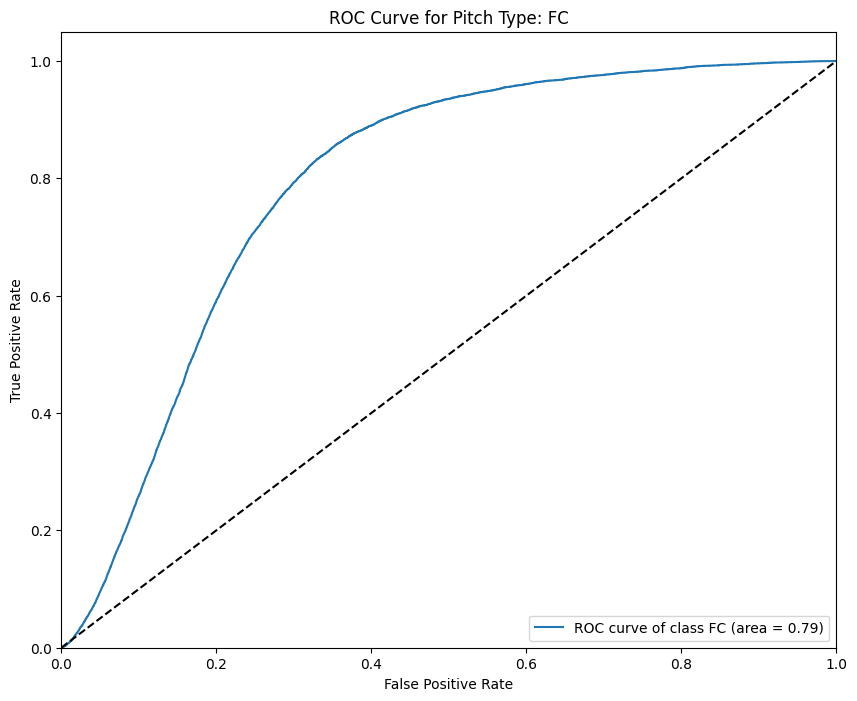

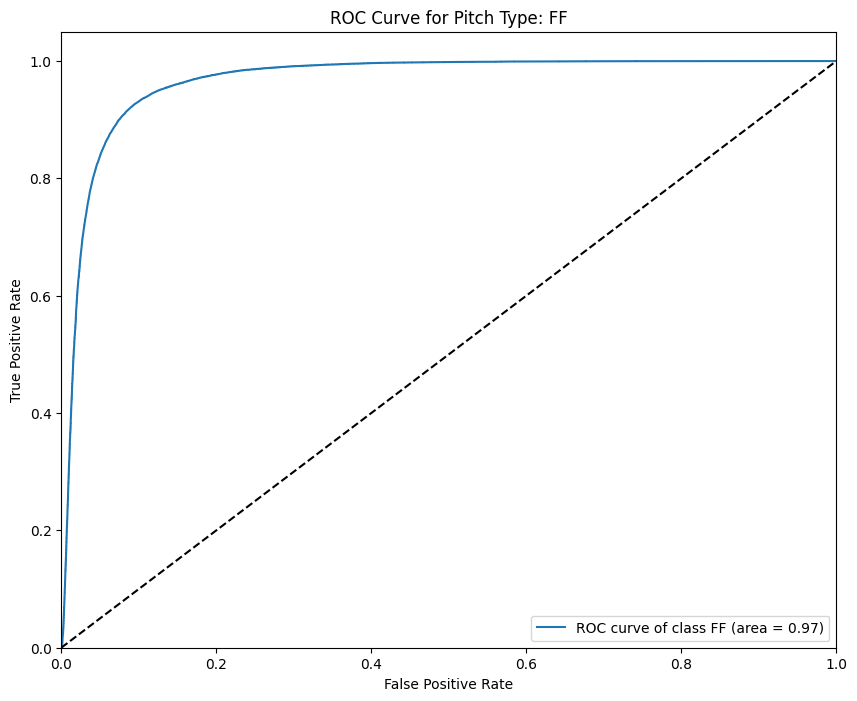

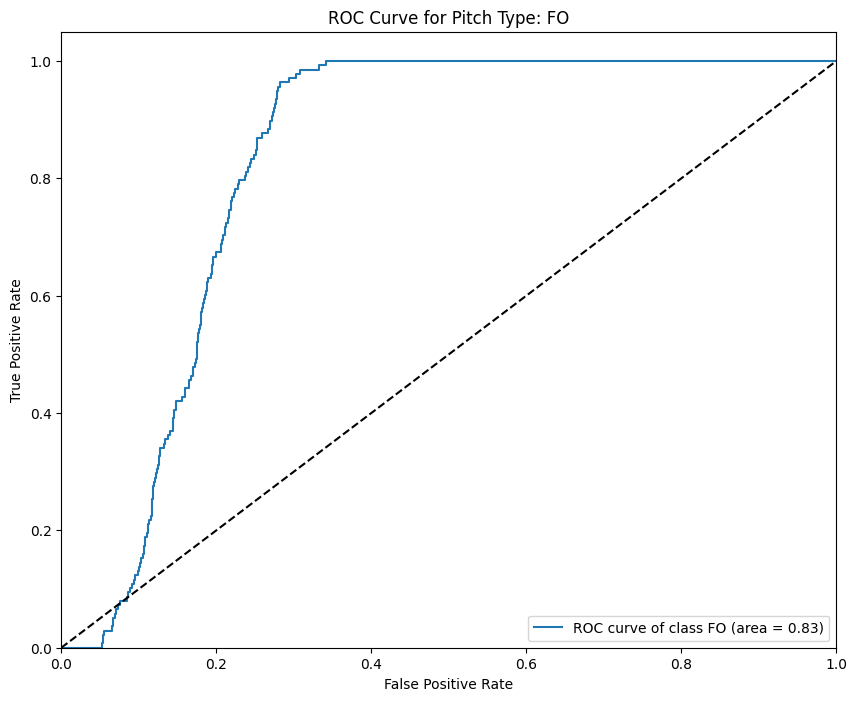

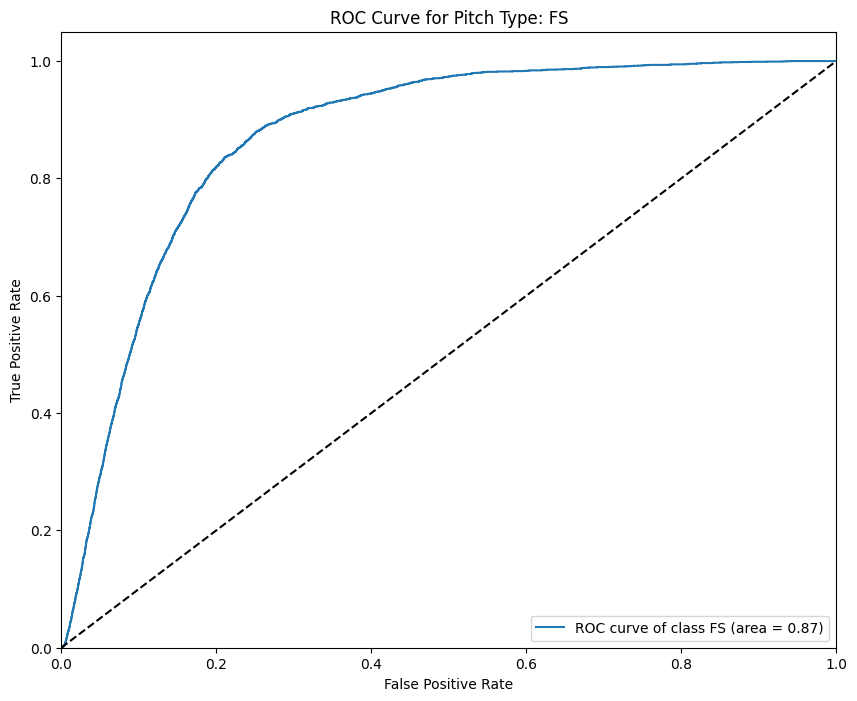

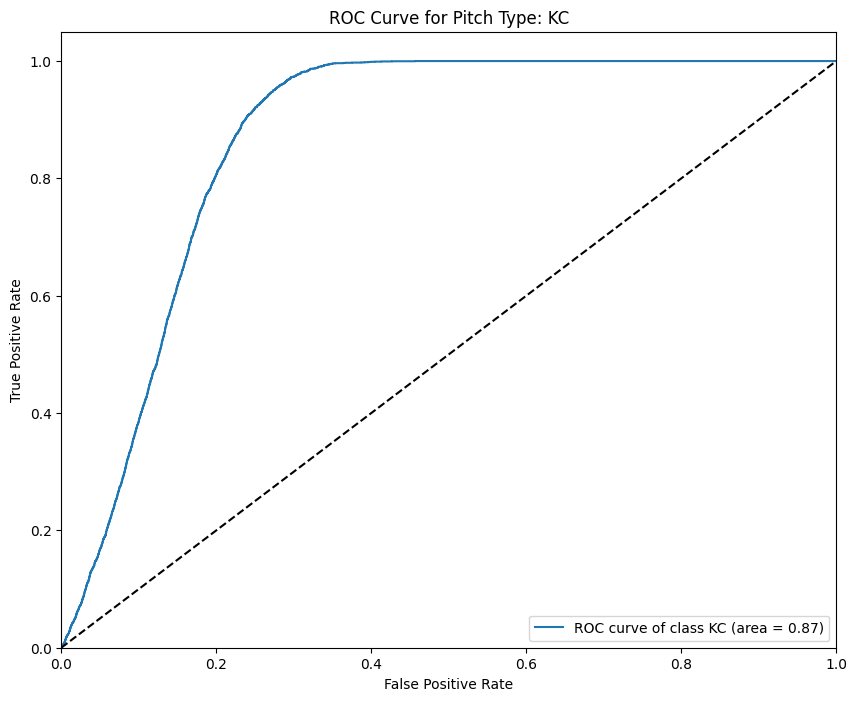

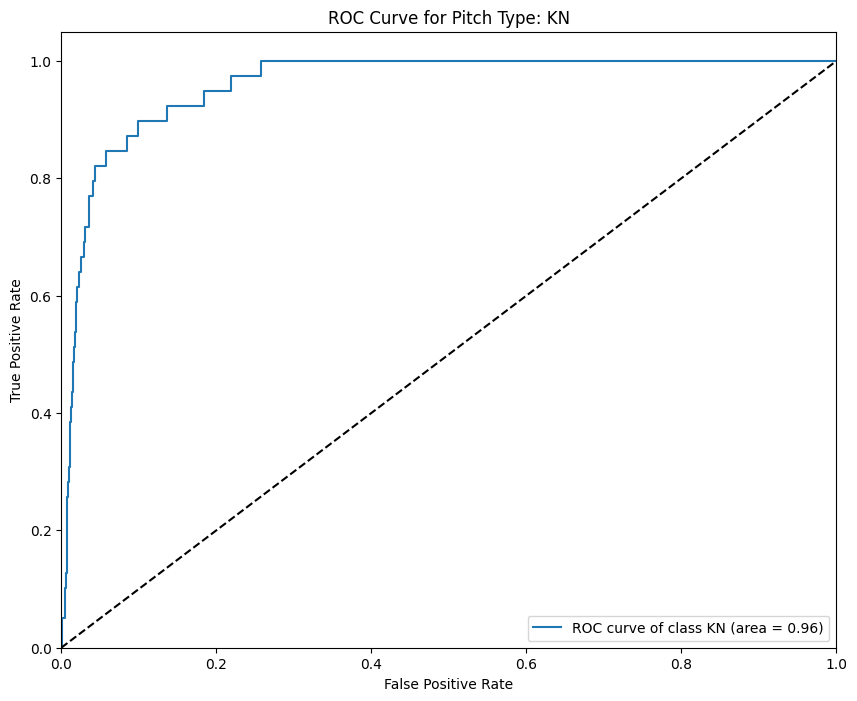

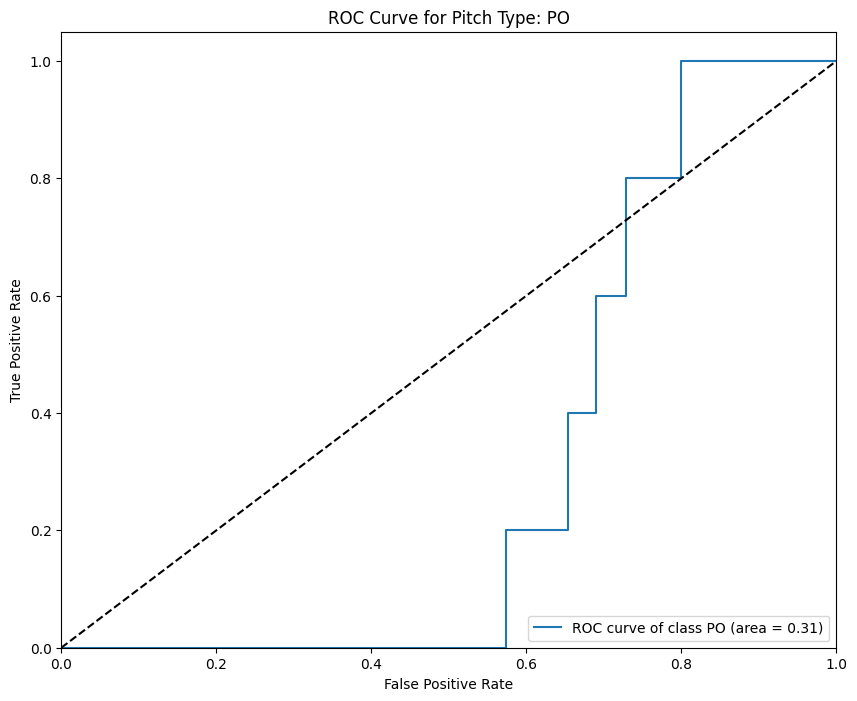

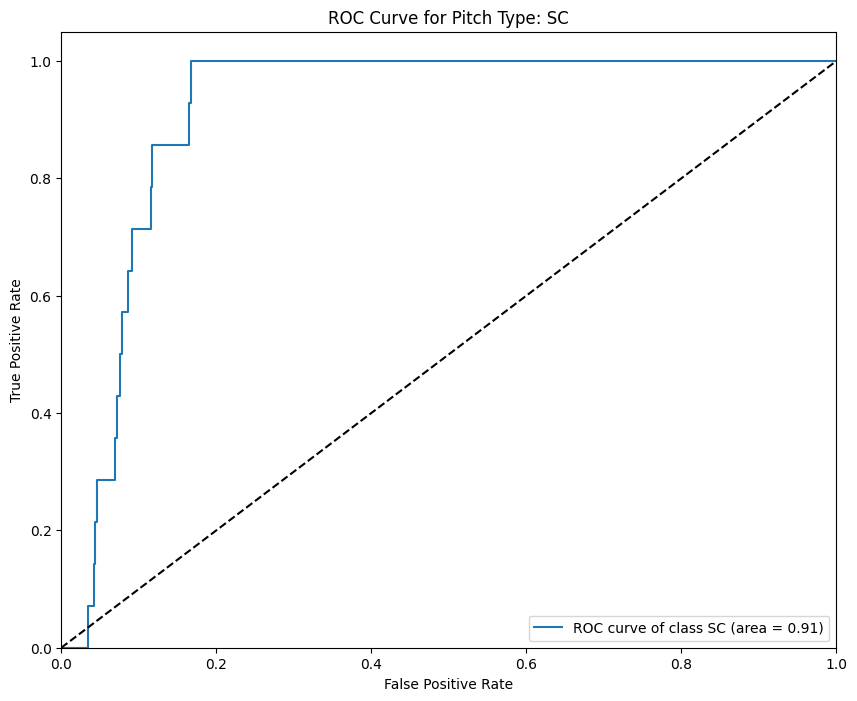

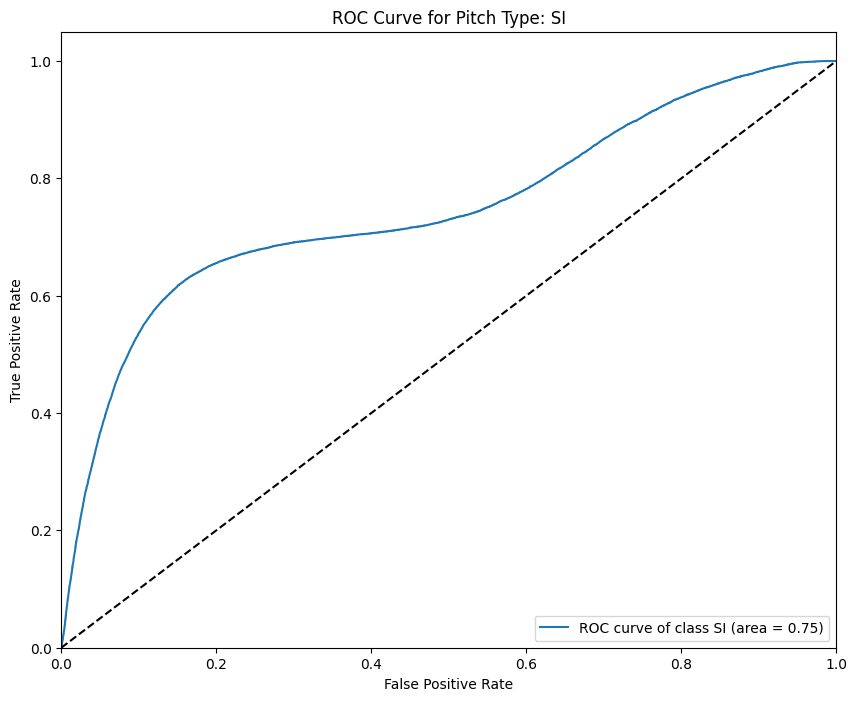

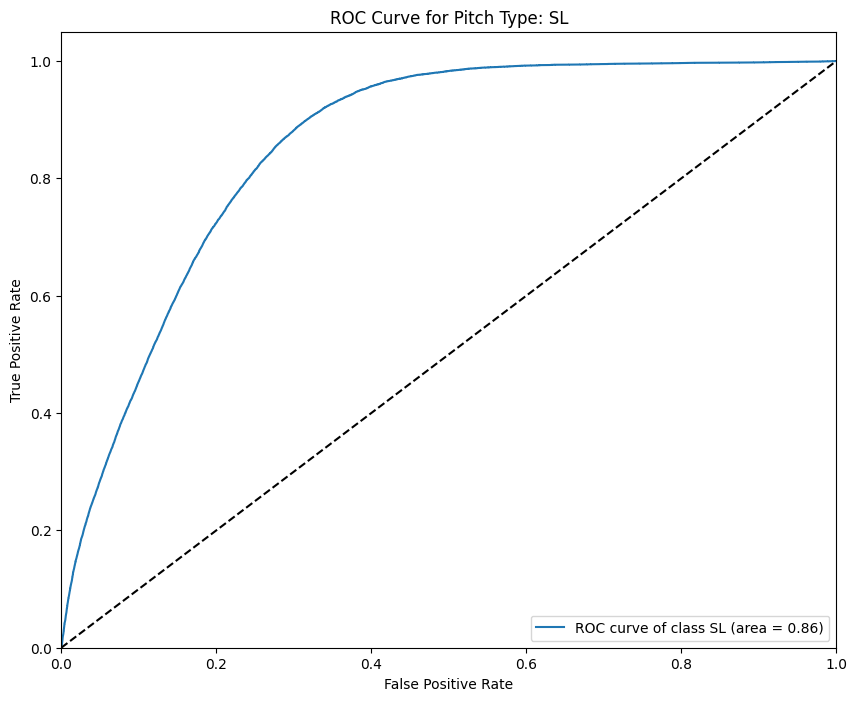

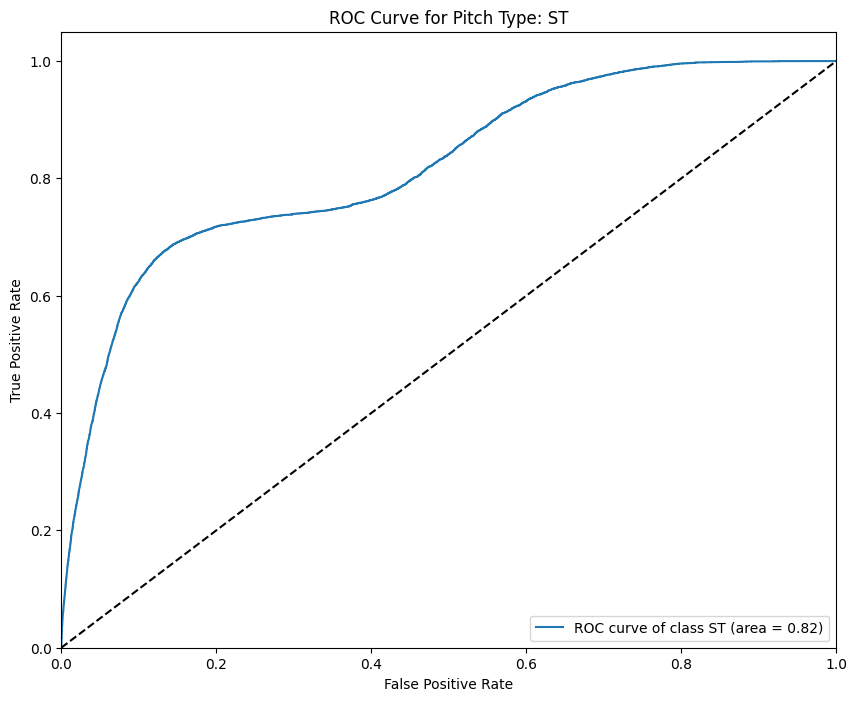

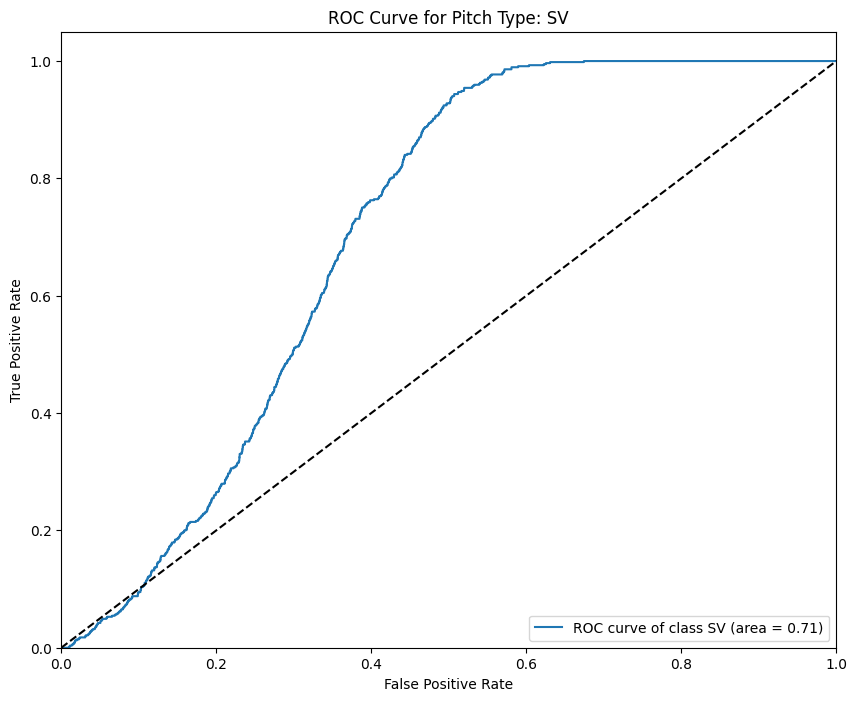

In [63]:
# prompt: plot a different ROC curve for each y_pred class (ie. one curve for FF predictions, separate for SI predictions, etc)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
# plt.figure(figsize=(10, 8))
for i in range(n_classes):
    pitch_type = np.unique(y_test)[i]
    plt.figure(figsize=(10, 8))
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {np.unique(y_test)[i]} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Pitch Type: {pitch_type}')
    plt.legend(loc="lower right")
    plt.show()


## SVM

In [70]:
data_imputed.head()

,release_speed,pfx_x,pfx_z,plate_x,plate_z,pitch_type
0,89.0,-1.53,0.33,0.33,2.01,CH
1,96.9,-0.76,1.36,0.09,2.71,FF
2,90.0,-1.65,0.36,-0.24,0.53,CH
3,82.2,1.43,0.28,0.81,0.49,ST
4,89.2,-1.49,0.31,-0.78,2.05,CH


In [66]:
from sklearn.svm import SVC  # Import the SVM classifier
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.metrics import accuracy_score, classification_report # For evaluating the model
from sklearn.preprocessing import StandardScaler # For scaling the data (Generally Recommended for SVMs)
from sklearn.pipeline import make_pipeline

In [68]:
X = data_imputed[features]
y = data_imputed[target]

In [71]:
# Assuming X is your feature data and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to scale the data and then apply the SVM
clf = make_pipeline(StandardScaler(), SVC())

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

**Kernel:** You can choose different kernels for the SVM, such as 'linear', 'rbf' (radial basis function), 'poly' (polynomial), and 'sigmoid'. The kernel determines how the data is transformed into a higher-dimensional space for better separability. Experiment to find the best kernel for your data.

**Regularization parameter (C):** The C parameter controls the trade-off between achieving a low training error and a low testing error (generalization). A higher C value emphasizes minimizing the training error, potentially leading to overfitting, while a lower C value encourages better generalization.

**Data Scaling:** Scaling your features is often crucial for SVMs to perform well. StandardScaler is a common choice, but you can explore other scaling methods as well.

## Multiclass Logistic Regression

In [31]:
X = data_imputed[features]
y = data_imputed[target]

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature data (release_speed, pfx_x, etc.) and y is your target variable (pitch_type)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LogisticRegression model with multi_class='multinomial'
# solver='lbfgs' is a suitable solver for multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Accuracy: 0.6190476190476191
              precision    recall  f1-score   support

          CH       0.48      0.37      0.42     15566
          CS       0.00      0.00      0.00        11
          CU       0.61      0.78      0.68      9407
          EP       0.10      0.02      0.03       117
          FA       0.01      0.00      0.01       218
          FC       0.26      0.07      0.11     11379
          FF       0.81      0.93      0.87     46184
          FO       0.00      0.00      0.00       138
          FS       0.05      0.00      0.00      3207
          KC       0.16      0.01      0.02      3030
          KN       0.00      0.00      0.00        39
          PO       0.00      0.00      0.00         5
          SC       0.00      0.00      0.00        14
          SI       0.55      0.62      0.58     22203
          SL       0.48      0.77      0.59     23398
          ST       0.81      0.02      0.03      8050
          SV       0.00      0.00      0.00       56

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**multi_class='multinomial':** This parameter explicitly tells the LogisticRegression model to use the multinomial logistic regression algorithm for multi-class classification. This is the direct approach to handling multiple classes.

**solver='lbfgs':** This parameter specifies the solver algorithm to use for optimization. 'lbfgs' is a suitable solver for multinomial logistic regression, as it can handle multi-class problems effectively. You might need to experiment with other solvers like 'newton-cg' or 'sag' if 'lbfgs' doesn't converge well for your data.

**max_iter=1000:** This parameter sets the maximum number of iterations for the solver to converge. You might need to adjust this value depending on the complexity of your data and the solver you're using. If the model doesn't converge within the specified iterations, you'll see a warning message, and you might need to increase max_iter.


####Important considerations:

**Feature Scaling:** It's generally a good practice to scale your features before applying logistic regression, especially if they have different scales or units. You can use StandardScaler or MinMaxScaler from sklearn.preprocessing for this purpose.

**Hyperparameter Tuning:** Consider using techniques like GridSearchCV or RandomizedSearchCV to find the optimal values for hyperparameters like C (regularization strength) and the solver to further improve the model's performance.

**Class Imbalance:** If you have significant class imbalance in your data (some pitch types occurring much more frequently than others), you might need to address it using techniques like oversampling, undersampling, or using the class_weight parameter in LogisticRegression to assign different weights to classes during training.

## Metric Explanation

**Precision**

Definition: Precision is the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives).
Interpretation: In your case, precision for a specific pitch type (e.g., fastball) would tell you, out of all the pitches your model predicted as fastballs, what percentage were actually fastballs.
Focus: Precision focuses on minimizing false positives. A high precision means that when your model predicts a certain pitch type, it's very likely to be correct.
Formula: Precision = True Positives / (True Positives + False Positives)

**Recall**

Definition: Recall is the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives).
Interpretation: Recall for a specific pitch type would tell you, out of all the actual fastballs in your data, what percentage did your model correctly identify as fastballs.
Focus: Recall focuses on minimizing false negatives. A high recall means that your model is able to identify most of the actual instances of a particular pitch type.
Formula: Recall = True Positives / (True Positives + False Negatives)

**F1-score**

Definition: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, considering both false positives and false negatives.
Interpretation: A high F1-score indicates that your model has both good precision and good recall for a specific pitch type.
Focus: F1-score is useful when you want to find a balance between precision and recall, especially when there's an uneven class distribution.
Formula: F1-score = 2 * (Precision * Recall) / (Precision + Recall)

**Applying to pitch type prediction:**

*High precision for a pitch type:* Your model is very accurate when it predicts that pitch type. It's rarely making false positive predictions for that type.
High recall for a pitch type: Your model is able to identify most of the actual instances of that pitch type. It's not missing many true positives.

*High F1-score for a pitch type:* Your model has a good balance between precision and recall for that type. It's both accurate and comprehensive in its predictions.
Example:

If your model has a precision of 0.8 for fastballs, it means that 80% of the pitches it predicted as fastballs were actually fastballs. If it has a recall of 0.9 for fastballs, it means that it correctly identified 90% of the actual fastballs in the data. An F1-score would provide a balanced measure considering both of these aspects.

